In [113]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Index
* [LR select features](#LR-select-features)
* [RF select features](#RF-select-features)
* [Composite](#Composite)

In [114]:
train_df = pd.read_csv("train_processed.csv",index_col="PassengerId")
ytrain = train_df["Survived"]

all_features = ["Pclass","Age","SibSp","Parch","Fare","IsMale",                
                'EmbarkC','EmbarkQ', 'EmbarkS',                 
                "Ticket-4digit","Ticket-5digit","Ticket-6digit","Ticket-7digit","Ticket-A","Ticket-C","Ticket-F","Ticket-Others","Ticket-P","Ticket-S","Ticket-W"]
Xtrain = train_df[feature_names]

### LR select features

In [115]:
def make_coefs_frame(feature_names,coefs):
    coefs = pd.DataFrame({"names":feature_names,"coefs":coefs},columns=["names","coefs"])
    coefs["importance"] = np.abs(coefs.coefs)
    coefs.sort_index(by="importance",inplace=True,ascending=False)
    coefs.set_index("names",inplace=True)
    return coefs

In [116]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
    
lrcv = LogisticRegressionCV()
lrcv.fit(Xtrain_scaled,ytrain)
    
train_score = lrcv.score(Xtrain_scaled,ytrain)
lr_coefs = make_coefs_frame(feature_names,lrcv.coef_.ravel())
    
print "train_score: %3.2f"%train_score
lr_coefs

train_score: 0.82


,coefs,importance
names,,
IsMale,-1.289085,1.289085
Pclass,-0.866972,0.866972
Age,-0.503425,0.503425
SibSp,-0.402895,0.402895
Ticket-W,-0.200658,0.200658
Ticket-5digit,0.176387,0.176387
Ticket-6digit,-0.146427,0.146427
Fare,0.131300,0.131300
Ticket-A,-0.130360,0.130360


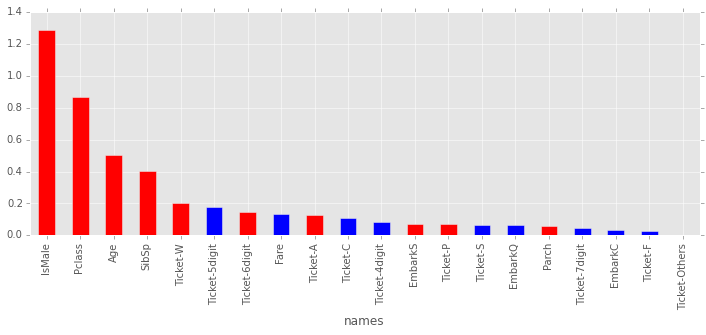

In [117]:
bar_colors = np.where(coefs.coefs > 0,"b","r")    
lr_coefs.importance.plot(kind="bar",color=bar_colors,figsize=(12,4))

### RF select features

In [118]:
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)
print "train score: %3.2f"%(rf.score(Xtrain,ytrain))

train score: 0.97


In [119]:
def make_importance_frame(feature_names,importances):
    coefs = pd.DataFrame({"names":feature_names,"importance":importances},columns=["names","importance"])
    coefs.sort_index(by="importance",inplace=True,ascending=False)
    coefs.set_index("names",inplace=True)
    return coefs
rf_importances = make_importance_frame(feature_names,rf.feature_importances_)
rf_importances

,importance
names,
IsMale,0.250275
Age,0.248479
Fare,0.220881
Pclass,0.070961
SibSp,0.052784
Parch,0.041647
Ticket-5digit,0.019874
EmbarkS,0.015241
Ticket-6digit,0.014543


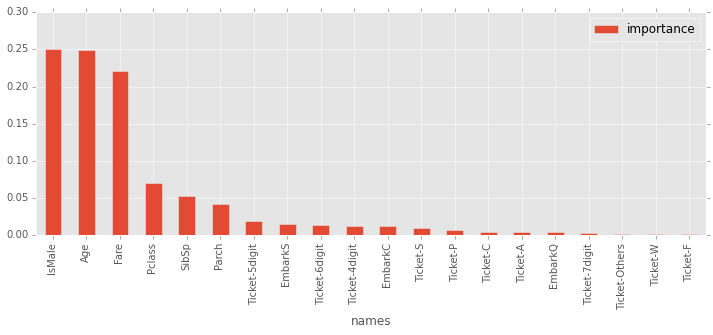

In [120]:
rf_importances.plot(kind="bar",figsize=(12,4))

### Composite

In [125]:
importances = pd.concat([lr_coefs.importance,rf_importances.importance],keys=["lr_importance","rf_importance"],axis=1)
importances.sort_index(by="rf_importance",ascending=False,inplace=True)
importances

,lr_importance,rf_importance
IsMale,1.289085,0.250275
Age,0.503425,0.248479
Fare,0.131300,0.220881
Pclass,0.866972,0.070961
SibSp,0.402895,0.052784
Parch,0.059519,0.041647
Ticket-5digit,0.176387,0.019874
EmbarkS,0.072387,0.015241
Ticket-6digit,0.146427,0.014543
Ticket-4digit,0.083654,0.012616


In [123]:
min_importances = importances.min()
importance_ranges = importances.max() - min_importances
normed_importances = (importances - min_importances)/importance_ranges

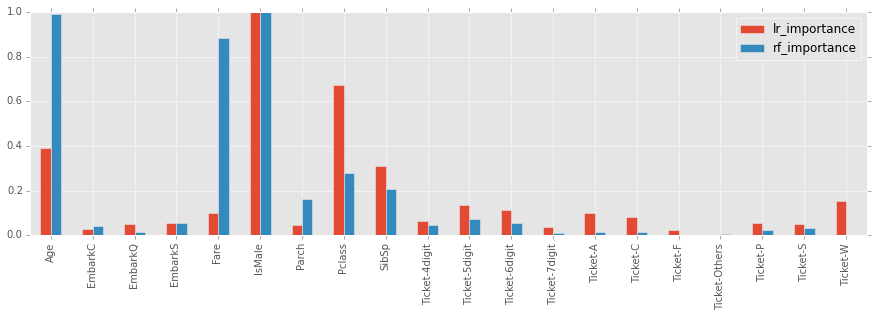

In [124]:
normed_importances.plot(kind="bar",figsize=(15,4))

so we choose features:
* Age
* Fare
* IsMale
* Parch
* Pclass
* SibSp
* Ticket-4digit
* Ticket-5digit
* Ticket-6digit